#### 머신러닝 4일차 과제 (auto-mpg.csv 연비 분석 모델) _ 임소영


1) mpg: 연비, continuous

2) cylinders: 실린더 개수, multi-valued discrete

3) displacement: 배기량, continuous

4) horsepower: 마력, continuous

5) weight: 무게, continuous

6) acceleration: 엔진이 초당 얻을 수 있는 가속력, continuous

7) model year: 출시 년도, multi-valued discrete

8) origin: 제조 장소(1: 미국 USA, 2: 유럽 EU, 3: 일본 JPN), multi-valued discrete

9) car name: 자동차 이름, string (unique for each instance)

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [260]:
file = '../data/auto-mpg.csv'
data = pd.read_csv(file)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [261]:
data.info()
# cylinders, model year, origin => category로 형변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [262]:
data['cylinders'] = data['cylinders'].astype('category')
data['model year'] = data['model year'].astype('category')
data['origin'] = data['origin'].astype('category')
#data['horsepower'] = data['horsepower'].astype('int64')
data.info()

# horsepower 컬럼에서 형변환이 되지 않는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    object  
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    category
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(3), float64(3), int64(1), object(2)
memory usage: 20.9+ KB


In [263]:
# 결측치 확인
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [264]:
# 중복값 확인
data.duplicated().sum()

0

In [265]:
# 값 확인
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [266]:
list = data.columns.tolist()

for col in list:
    print(data[col].unique())
    print('-'*50)

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
--------------------------------------------------
[8, 4, 6, 3, 5]
Categories (5, int64): [3, 4, 5, 6, 8]
--------------------------------------------------
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  1

In [267]:
data['horsepower'] = data['horsepower'].replace('?', '0')

In [268]:
data['horsepower'] = data['horsepower'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    int64   
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    category
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 20.9+ KB


In [269]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [270]:
# 이상치 확인
col_numeric = data.columns.tolist()[:-1]

data[col_numeric].head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


In [271]:
col_list = data[col_numeric].columns.tolist()
col_list

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

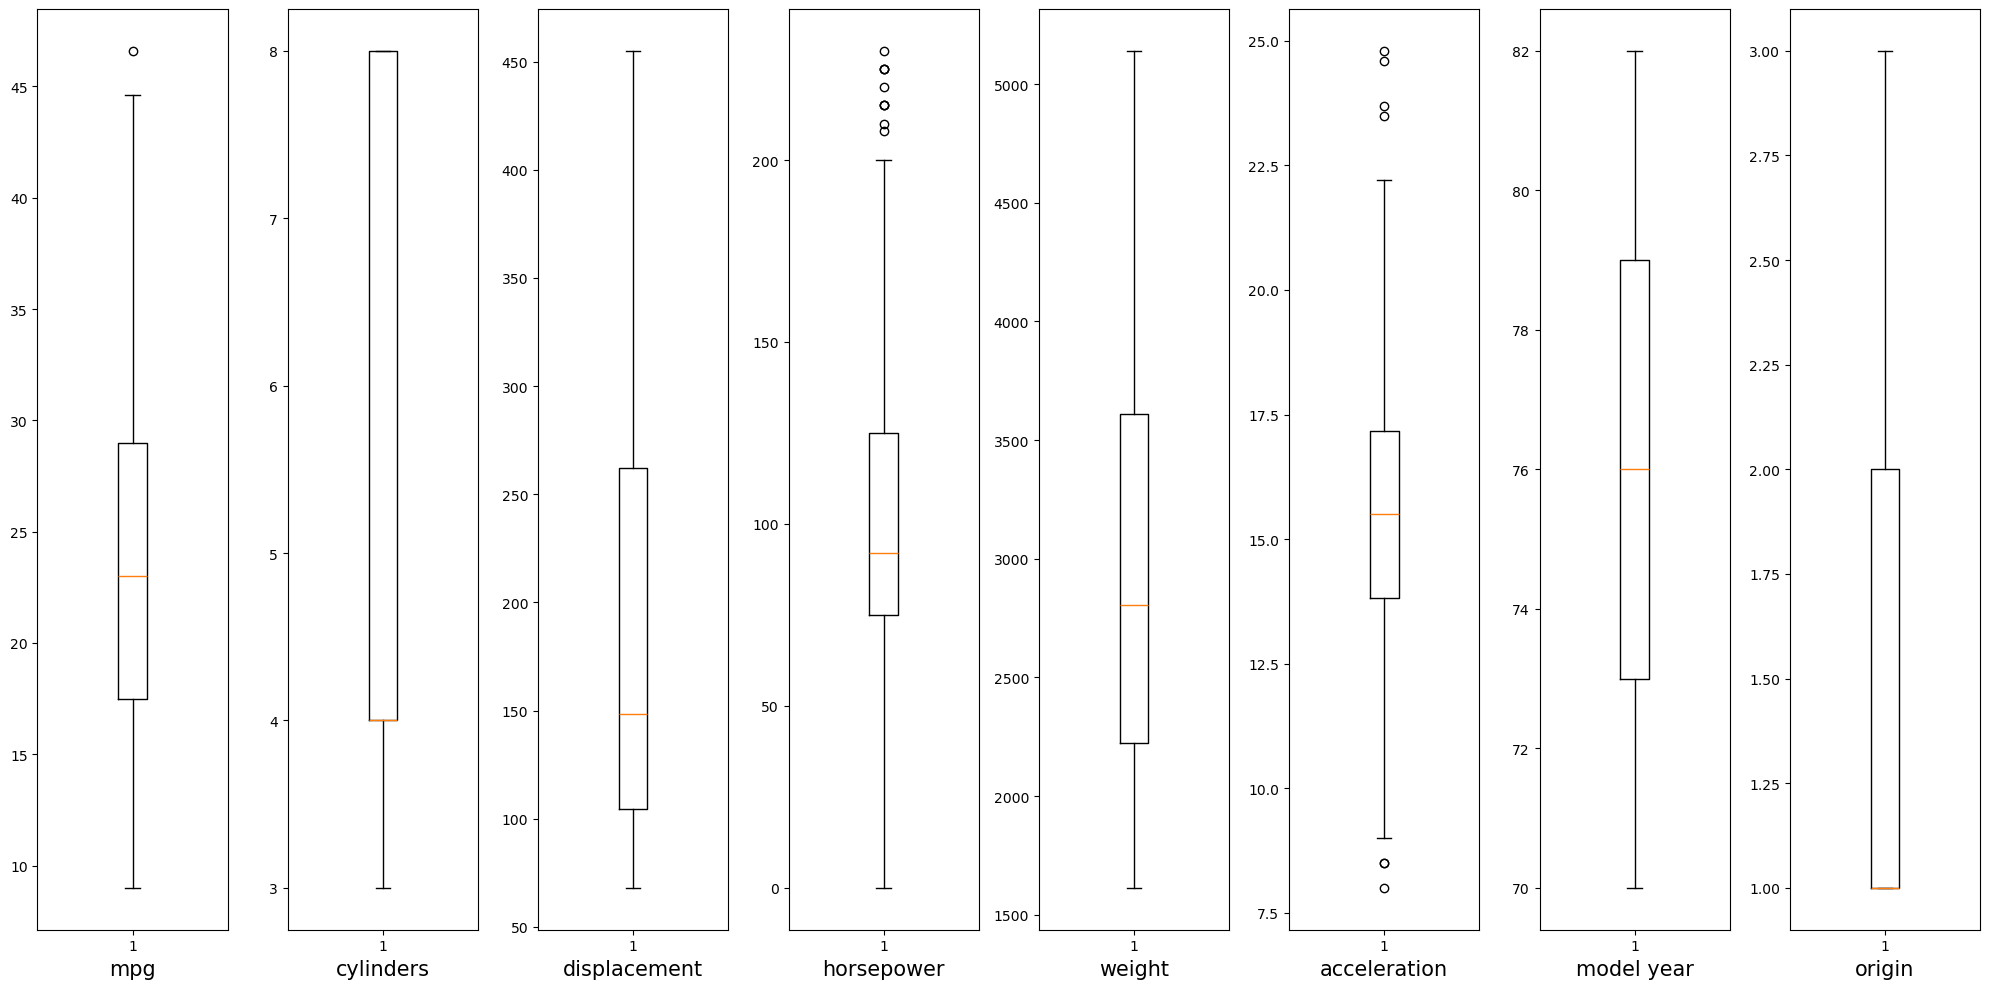

In [272]:
bp_obj = []
plt.figure(figsize = (20, 10))
for i in range(len(col_list)):
    plt.subplot(1 ,len(col_list), i+1)
    plt.xlabel(col_list[i], fontsize=15)
    obj = plt.boxplot(data[col_list[i]])
    bp_obj.append(obj)
plt.tight_layout()  # 표들끼리 겹치지 않게끔 해준다
plt.show()

In [273]:
# 각 컬럼별의 딕셔너리가 하나의 리스트에 담겼다.
bp_obj

[{'whiskers': [<matplotlib.lines.Line2D at 0x200b3cb82e0>,
  'caps': [<matplotlib.lines.Line2D at 0x200b28516d0>,
  'boxes': [<matplotlib.lines.Line2D at 0x200b3cb8cd0>],
  'medians': [<matplotlib.lines.Line2D at 0x200b2378130>],
  'fliers': [<matplotlib.lines.Line2D at 0x200b3c52fd0>],
  'means': []},
 {'whiskers': [<matplotlib.lines.Line2D at 0x200b3d9f640>,
  'caps': [<matplotlib.lines.Line2D at 0x200b3d9fc10>,
  'boxes': [<matplotlib.lines.Line2D at 0x200b3bab2b0>],
  'medians': [<matplotlib.lines.Line2D at 0x200b3d9f9d0>],
  'fliers': [<matplotlib.lines.Line2D at 0x200b3d9fdf0>],
  'means': []},
 {'whiskers': [<matplotlib.lines.Line2D at 0x200b280a280>,
  'caps': [<matplotlib.lines.Line2D at 0x200b472ff10>,
  'boxes': [<matplotlib.lines.Line2D at 0x200b3ba5910>],
  'medians': [<matplotlib.lines.Line2D at 0x200b3b53a00>],
  'fliers': [<matplotlib.lines.Line2D at 0x200b3c5caf0>],
  'means': []},
 {'whiskers': [<matplotlib.lines.Line2D at 0x200b3eab820>,
  'caps': [<matplotlib.lines.

In [274]:
drop_list_set = []
for i in range(len(bp_obj)):
    value = bp_obj[i]  #1개의 컬럼 가져옴
    drop_list = value['fliers'][0].get_ydata().tolist()
    #print('='*50)
    #print(f"drop_list : {drop_list}") # 1개의 컬럼에 대한 이상치 목록 가져옴
    drop_list_set.append(drop_list)
drop_list_set

[[46.6],
 [],
 [],
 [220, 215, 225, 225, 215, 210, 208, 215, 225, 230],
 [],
 [8.5, 8.5, 8.0, 23.5, 24.8, 23.7, 24.6],
 [],
 []]

In [275]:
#col_list = data[col_numeric].columns.tolist()

In [276]:
# 각 컬럼별 이상치를 0으로 바꾸었다.
# 원래는 아예 제거하려고 했는데 제거가 되지 않는다. (shape 출력에서 수가 감소하지 않고 그대로 유지된다)

for i in range(len(drop_list_set)):
    drop_list = drop_list_set[i]
    print(f"========================= {i} =========================")
    print(f"drop_list => {drop_list}")
    if len(drop_list) != 0:
        for d in drop_list:
            drop = d
            print(f"-- drop_list에서 제거할 값 => {d}")
            print(f"-- data에서 이상치 제거할 컬럼 목록 => {col_list[i]}")
            data[col_list[i]] = data[col_list[i]].replace(drop, 0)
            #data[col_list[i]].drop()
            
            # data[col_list[i]] = data[col_list[i]].replace(drop, np.NaN)
            # print(data[col_list[i]].isnull().sum())
            # data = data.dropna()
            # print(f"NaN값 설정 후 dropna 시키기 완료 : {data[col_list[i]].shape}")
        #print('='*50)

========================= 0 =========================
drop_list => [46.6]
-- drop_list에서 제거할 값 => 46.6
-- data에서 이상치 제거할 컬럼 목록 => mpg
========================= 1 =========================
drop_list => []
========================= 2 =========================
drop_list => []
========================= 3 =========================
drop_list => [220, 215, 225, 225, 215, 210, 208, 215, 225, 230]
-- drop_list에서 제거할 값 => 220
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 215
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 225
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 225
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 215
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 210
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 208
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 215
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서 제거할 값 => 225
-- data에서 이상치 제거할 컬럼 목록 => horsepower
-- drop_list에서

In [277]:
col_list

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

}### mpg를 타겟으로 할 때 피쳐값을 무엇으로 할지 결정해보자

In [278]:
# 사용할 데이터로 정리
use_data = data[['mpg','displacement', 'horsepower', 'weight', 'acceleration']]
use_data

# 생각해보니 꼭 카테고리 데이터를 제외할 필요가 없었다! 

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130,3504,12.0
1,15.0,350.0,165,3693,11.5
2,18.0,318.0,150,3436,11.0
3,16.0,304.0,150,3433,12.0
4,17.0,302.0,140,3449,10.5
...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6
394,44.0,97.0,52,2130,0.0
395,32.0,135.0,84,2295,11.6
396,28.0,120.0,79,2625,18.6


In [279]:
# 상관관계 분석하기
result = data.corr(numeric_only=True)['mpg']
result
# 상관관계가 높은 순위 : weight > displacement > horsepower > acceleration

mpg             1.000000
displacement   -0.788494
horsepower     -0.575480
weight         -0.816237
acceleration    0.261531
Name: mpg, dtype: float64

In [280]:
corr_list = result.values.tolist()[1:]
for i in range(len(corr_list)):
    corr_list[i] = round(corr_list[i], 2)
corr_list

[-0.79, -0.58, -0.82, 0.26]

In [281]:
# 시각화로도 관계성이 보이는지 확인해보자
#from hamsu import print_feature
# from hamsu import print_feature
# 
# features = ['displacement', 'horsepower', 'weight', 'acceleration']
# plt.figure(figsize = (20,8))
# print_feature(1, 4, use_data, 'mpg', features, corr_list)

# 시각화로 확인해보니 피쳐로 displacement, horsepower, weight로 해도 된다고 결론내렸다.

### 타겟 & 피처 분리

In [282]:
target = use_data['mpg']
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [283]:
feature = use_data[['displacement', 'horsepower', 'weight']]
feature.head()

,displacement,horsepower,weight
0,307.0,130,3504
1,350.0,165,3693
2,318.0,150,3436
3,304.0,150,3433
4,302.0,140,3449


### train & test set 분리

In [284]:
X_train,X_test, y_train,  y_test = train_test_split(feature, target, random_state=10)

In [285]:
print(f"[훈련용]\n X_train: {X_train.shape}       y_train: {y_train.shape}")
print(f"[테스트용]\n X_test: {X_test.shape}       y_test: {y_test.shape}")

[훈련용]
 X_train: (298, 3)       y_train: (298,)
[테스트용]
 X_test: (100, 3)       y_test: (100,)


### 타겟 데이터에 다항회귀를 적용해보자

In [286]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [287]:
poly.fit(X_train)

PolynomialFeatures(include_bias=False)

In [288]:
scaled_X_train = pd.DataFrame(poly.transform(X_train))
scaled_X_train.columns = poly.get_feature_names_out().tolist()
scaled_X_train

,displacement,horsepower,weight,displacement^2,displacement horsepower,displacement weight,horsepower^2,horsepower weight,weight^2
0,113.0,95.0,2278.0,12769.0,10735.0,257414.0,9025.0,216410.0,5189284.0
1,350.0,145.0,3988.0,122500.0,50750.0,1395800.0,21025.0,578260.0,15904144.0
2,107.0,75.0,2210.0,11449.0,8025.0,236470.0,5625.0,165750.0,4884100.0
3,105.0,74.0,2190.0,11025.0,7770.0,229950.0,5476.0,162060.0,4796100.0
4,98.0,83.0,2075.0,9604.0,8134.0,203350.0,6889.0,172225.0,4305625.0
...,...,...,...,...,...,...,...,...,...
293,112.0,88.0,2395.0,12544.0,9856.0,268240.0,7744.0,210760.0,5736025.0
294,119.0,92.0,2434.0,14161.0,10948.0,289646.0,8464.0,223928.0,5924356.0
295,198.0,95.0,2833.0,39204.0,18810.0,560934.0,9025.0,269135.0,8025889.0
296,198.0,95.0,3102.0,39204.0,18810.0,614196.0,9025.0,294690.0,9622404.0


In [289]:
scaled_X_test = pd.DataFrame(poly.transform(X_test))
scaled_X_test.columns = poly.get_feature_names_out().tolist()
scaled_X_test

,displacement,horsepower,weight,displacement^2,displacement horsepower,displacement weight,horsepower^2,horsepower weight,weight^2
0,97.0,67.0,2145.0,9409.0,6499.0,208065.0,4489.0,143715.0,4601025.0
1,70.0,90.0,2124.0,4900.0,6300.0,148680.0,8100.0,191160.0,4511376.0
2,105.0,63.0,2215.0,11025.0,6615.0,232575.0,3969.0,139545.0,4906225.0
3,97.0,75.0,2155.0,9409.0,7275.0,209035.0,5625.0,161625.0,4644025.0
4,91.0,70.0,1955.0,8281.0,6370.0,177905.0,4900.0,136850.0,3822025.0
...,...,...,...,...,...,...,...,...,...
95,121.0,112.0,2933.0,14641.0,13552.0,354893.0,12544.0,328496.0,8602489.0
96,151.0,84.0,2635.0,22801.0,12684.0,397885.0,7056.0,221340.0,6943225.0
97,225.0,105.0,3439.0,50625.0,23625.0,773775.0,11025.0,361095.0,11826721.0
98,91.0,53.0,1795.0,8281.0,4823.0,163345.0,2809.0,95135.0,3222025.0


### 학습, 검정, 예측을 해보자

In [290]:
model = LinearRegression()
model

LinearRegression()

In [291]:
model.fit(scaled_X_train, y_train)

LinearRegression()

In [292]:
print(f"모델 파라미터 : \n coef_ : {model.coef_}      intercept_ : {model.intercept_} ")

모델 파라미터 : 
 coef_ : [-1.09635244e-01 -5.05620251e-02 -1.71397409e-03  2.15696913e-05
  2.44603570e-04  1.96000635e-05 -4.49900867e-04  8.73687413e-06
 -1.15021400e-06]      intercept_ : 48.907776154284896 


In [293]:
model.score(scaled_X_test, y_test)

0.7518562239526926

In [294]:
model.score(scaled_X_train, y_train)

0.7037326263506749

In [295]:
y_pred = model.predict(scaled_X_test)
y_pred

array([31.02359389, 30.43997325, 30.61888042, 30.40671321, 31.85948078,
       31.94833568, 28.44543985, 16.63510258, 32.66050568, 27.47615273,
       26.62885462, 30.7266229 , 32.0395192 , 23.98581312, 23.93728551,
       23.25763541, 24.76917331, 15.19022177, 13.7555032 , 26.86894829,
       20.34142239, 12.46760589, 31.89005532, 19.74520152, 22.8828216 ,
       24.48346885, 24.18893776, 21.75668758, 25.24559448, 27.13971489,
       15.35352018, 13.05537942, 28.876037  ,  8.64453131, 35.78356951,
       26.13323257, 31.34917776, 15.29778319, 20.82265688, 13.31820585,
       32.5073813 , 24.96887172, 15.90776203, 20.5064385 , 30.88052107,
       33.74742553, 19.21250069, 13.40572083, 24.92758317, 17.17304031,
       20.91503861, 19.68269316, 23.89562027, 20.35536509, 30.78121641,
       31.99932011, 17.86750432, 15.55797059, 31.74891813, 27.119983  ,
       28.22457589, 22.5694138 , 32.46882158, 16.52407537, 31.69428254,
       17.36323879, 24.67863835, 19.08203734, 15.21580872, 27.82

In [296]:
print('[ 모델설명도 ]')
print(f"설정계수값(R2) : {r2_score(y_test, y_pred)}")
print('[ 에러 ]')
print(f"평균제곱오차(MSE) : {mean_squared_error(y_test, y_pred)}")
print(f"평균절대값오차(MAE) : {mean_absolute_error(y_test, y_pred)}")
print()

[ 모델설명도 ]
설정계수값(R2) : 0.7518562239526926
[ 에러 ]
평균제곱오차(MSE) : 14.644753589320688
평균절대값오차(MAE) : 2.9001484294611406


### 스케일링 + 학습 + 검정

##### 스케일링에 따른 score 변화

In [297]:
test_dict = {}
def scaling(scale_type):
    scaler = scale_type
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(scaled_X_train, y_train)
    print(f"[모델 파라미터] \n - coef_ : {model.coef_} \n - intercept_ : {model.intercept_}\n")

    train_score = model.score(scaled_X_train, y_train)
    test_score = model.score(scaled_X_test, y_test)
    print(f"[score 비교] \n  train_score = {train_score} --- test_score = {test_score}")
    print()
    test_dict[scale_type] = test_score
    return scaler, scaled_X_train, scaled_X_test, model
    
scaling(StandardScaler())
scaling(MinMaxScaler())
scaler, scaled_X_train, scaled_X_test, model = scaling(RobustScaler())

[모델 파라미터] 
 - coef_ : [-1.77393253 -0.74823857 -4.25606897] 
 - intercept_ : 23.486241610738254

[score 비교] 
  train_score = 0.6718186983645191 --- test_score = 0.6923053038683202

[모델 파라미터] 
 - coef_ : [ -6.5145829   -3.79637801 -17.58093046] 
 - intercept_ : 34.35068364806038

[score 비교] 
  train_score = 0.6718186983645191 --- test_score = 0.69230530386832

[모델 파라미터] 
 - coef_ : [-2.70599277 -0.78132527 -6.83024382] 
 - intercept_ : 25.377791151827452

[score 비교] 
  train_score = 0.6718186983645191 --- test_score = 0.6923053038683202


확인해보니 모두 score가 거의 유사하다. 아무꺼나 써도 상관없을 듯 하다
그리고 훈련점수와 테스트 점수의 차이가 크지 않으므로 >>최적적합<<으로 판단가능하다.

### 예측

In [298]:
scaled_X_test

array([[-0.30482115, -0.56441718, -0.48056924],
       [-0.47278383,  0.        , -0.49589491],
       [-0.25505443, -0.66257669, -0.42948367],
       [-0.30482115, -0.36809816, -0.4732713 ],
       [-0.34214619, -0.49079755, -0.61923007],
       [-0.34214619, -0.5398773 , -0.60828316],
       [-0.30482115,  0.04907975, -0.37620872],
       [ 0.97045101,  0.98159509,  0.77832512],
       [-0.41679627, -0.56441718, -0.61339172],
       [-0.23639191,  0.09815951, -0.30979748],
       [-0.19906687,  0.02453988, -0.16164933],
       [-0.34836703, -0.46625767, -0.42364532],
       [-0.34214619, -0.56441718, -0.61193213],
       [-0.0933126 ,  0.3190184 ,  0.01933954],
       [ 0.32970451,  0.        , -0.11348294],
       [-0.155521  ,  0.61349693, -0.00620325],
       [-0.16174184, -0.07361963,  0.12807882],
       [ 1.27527216,  1.54601227,  0.96734173],
       [ 1.58009331,  1.96319018,  1.41762452],
       [-0.06842924, -0.14723926, -0.22879037],
       [ 0.64696734,  0.24539877,  0.349

In [299]:
y_pred = model.predict(scaled_X_test).round(1)
y_pred

array([29.9, 30. , 29.5, 29.7, 30.9, 30.9, 28.7, 16.7, 31.1, 28.1, 27. ,
       29.6, 30.9, 25.2, 25.3, 25.4, 25. , 14.1,  9.9, 27.2, 21.1, 11. ,
       30.8, 21.3, 24.9, 26.6, 25.2, 22.6, 26.3, 26.9, 16.1, 14.2, 29. ,
       12.7, 33. , 27. , 30.3, 15.7, 20.8, 13.1, 31. , 26. , 17.2, 21.3,
       30.8, 31.9, 20. , 11.6, 25.6, 15.2, 22.2, 20.6, 23.9, 21.1, 30.5,
       31.1, 19.8, 15.7, 30.8, 28.2, 28.7, 24.2, 31.5, 16.8, 30.4, 15.8,
       25.8, 19.7, 16.1, 27.8, 18.4, 30. , 23. , 23.9, 30.3, 30.1, 14.7,
       20.2, 14.7, 16.3, 30.8, 31. , 27.2, 22.6, 31. , 31.3, 26.8, 22.5,
       21.7, 21.7, 30.9, 12.4, 19.6, 12.4, 16.1, 24.7, 26.2, 20.6, 32. ,
       27.9])

In [300]:
# new_data = [[300, 100, 3000]]
# new_data = pd.DataFrame(new_data)
# #print(new_data)
# 
# scaler.transform(new_data)
# model.predict(new_data)

# 뭔가 잘못되긴 했다. 마이너스 값이 나온다.

### 성능평가

In [301]:
print('[ 모델설명도 ]')
print(f"설정계수값(R2) : {r2_score(y_test, y_pred)}")
print('[ 에러 ]')
print(f"평균제곱오차(MSE) : {mean_squared_error(y_test, y_pred):.4f}")
print(f"평균절대값오차(MAE) : {mean_absolute_error(y_test, y_pred):.4}")
print()

[ 모델설명도 ]
설정계수값(R2) : 0.6925659533453724
[ 에러 ]
평균제곱오차(MSE) : 18.1439
평균절대값오차(MAE) : 3.289
